# The purpose of this case study is to offer another illustration of market segmentation analysis using a different empirical data set.

### A.1 Step 1: Deciding (not) to Segment
McDonald’s can take the position that it caters to the entire market and that
there is no need to understand systematic differences across market segments.
Alternatively, McDonald’s can take the position that, despite their market power,
there is value in investigating systematic heterogeneity among consumers and
harvest these differences using a differentiated marketing strategy.

### A.2 Step 2: Specifying the Ideal Target Segment

### A.3 Step 3: Collecting Data

### A.4 Step 4: Exploring Data



In [34]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from collections import Counter
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

In [35]:
import pandas as pd

# Load the dataset
mcdonalds = pd.read_csv("/content/sample_data/mcdonalds.csv")

# Checking the column names
print(mcdonalds.columns)

# Checking the dimensions of the dataset
print(mcdonalds.shape)

# Displaying the first 3 rows
print(mcdonalds.head(3))

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [36]:
MD_x = mcdonalds.iloc[:, 0:11]
MD_x = (MD_x == "Yes").astype(int)

# Computing the column means
column_means = np.round(MD_x.mean(), 2)

# Displaying the column means
print(column_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


[[ 0.4 -0.2  0.7 ...  0.2  0.5 -0.6]
 [-0.2  0.4 -0.7 ...  0.1  0.5 -0.5]
 [ 0.4  0.7 -0.1 ... -0.3  0.1  0.2]
 ...
 [-0.2  1.1  0.2 ...  0.   0.1 -0. ]
 [-1.2 -0.   0.6 ...  0.  -0.  -0.1]
 [ 1.6  0.3 -0.  ... -0.1 -0.4 -0.5]]


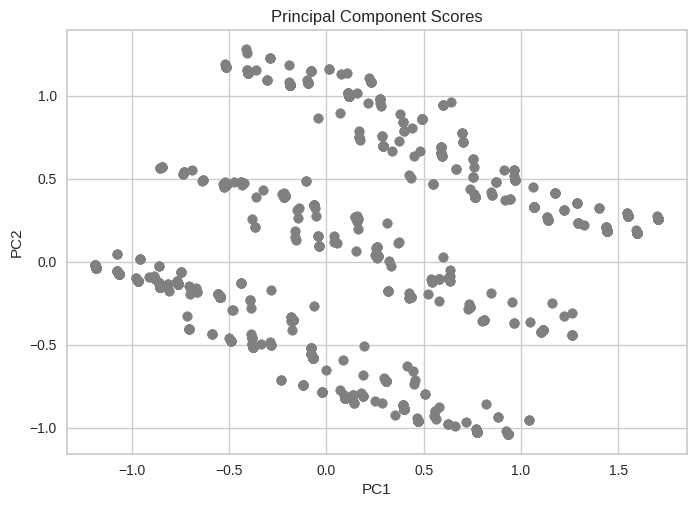

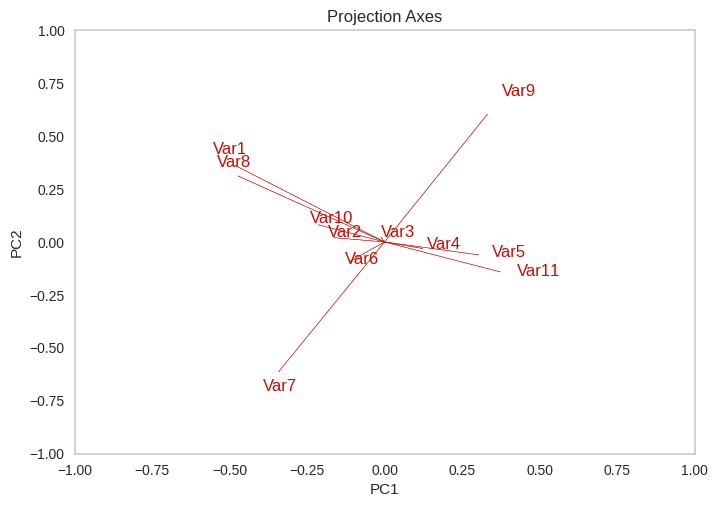

In [37]:
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Print the PCA results with one decimal point precision
print(np.round(MD_pca, 1))

# Plot the principal component scores
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Scores')
plt.show()

# Plot the projection axes
loadings = np.round(pca.components_, 2)
for i in range(loadings.shape[1]):
    plt.arrow(0, 0, loadings[0, i], loadings[1, i], color='r', alpha=0.75)
    plt.text(loadings[0, i]*1.15, loadings[1, i]*1.15, f"Var{i+1}", color='r')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection Axes')
plt.grid()
plt.show()

### Step 5: Extracting Segments

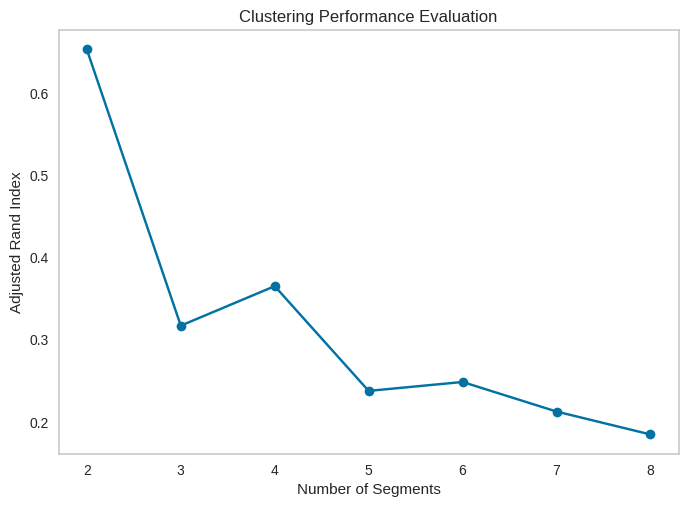

In [38]:
from sklearn import metrics
np.random.seed(1234)

# Perform KMeans clustering for different numbers of clusters (2 to 8)
n_clusters_range = range(2, 9)
adjusted_rand_index = []

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(MD_x)
    ari = metrics.adjusted_rand_score(MD_x["yummy"], cluster_labels)
    adjusted_rand_index.append(ari)

# Plot the clustering performance (adjusted Rand index)
plt.plot(n_clusters_range, adjusted_rand_index, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Clustering Performance Evaluation')
plt.grid()
plt.show()

In [39]:
np.random.seed(1234)
from sklearn.mixture import GaussianMixture
# Perform KMeans clustering for 4 clusters
kmeans = KMeans(n_clusters=4, n_init=10, random_state=0)
kmeans_clusters = kmeans.fit_predict(MD_x)

# Modeling mixtures using flexmix
# Using GaussianMixture for model selection (you can choose appropriate model based on your data)
model = GaussianMixture(n_components=4, n_init=10, random_state=0)
model.fit(MD_x)

# Assigning data points to mixture components based on highest posterior probability
mixture_clusters = model.predict(MD_x)

# Contingency table for comparison
contingency_table = pd.crosstab(index=kmeans_clusters, columns=mixture_clusters, rownames=['kmeans'], colnames=['mixture'])
print(contingency_table)

mixture   0    1    2    3
kmeans                    
0        31   32   28  232
1        25    0  546    9
2        46  229   29    0
3        34  209    0    3


### Step 6: Profiling Segments

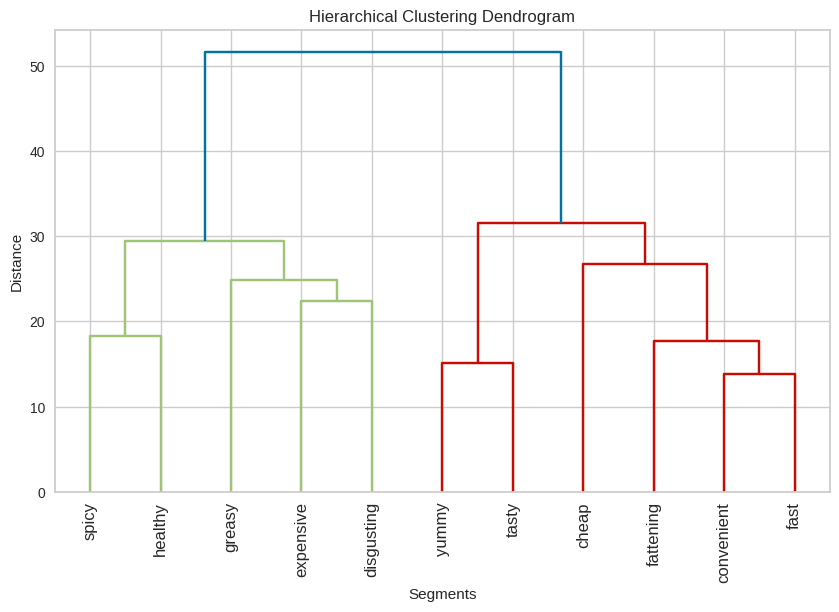

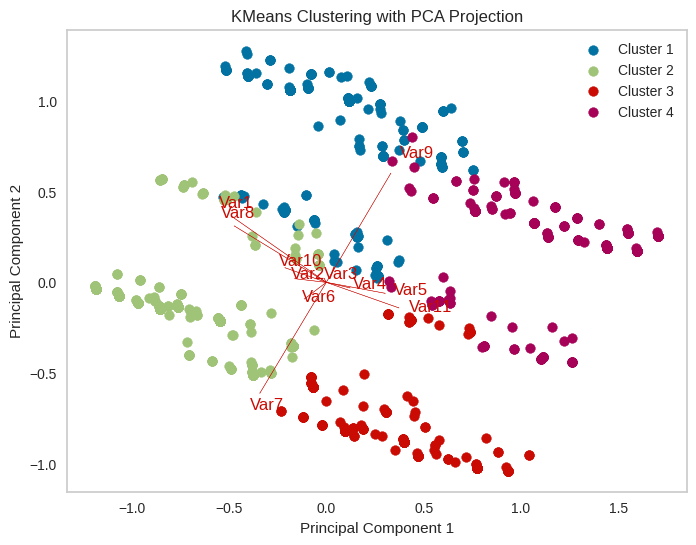

In [40]:
np.random.seed(1234)
from scipy.cluster.hierarchy import dendrogram, linkage
# Perform hierarchical clustering using Ward's method and Euclidean distance
Z = linkage(MD_x.T, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=MD_x.columns, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Segments')
plt.ylabel('Distance')
plt.show()

# Plot the KMeans clustering results with PCA projection
kmeans = KMeans(n_clusters=4, n_init=10, random_state=0)
kmeans_clusters = kmeans.fit_predict(MD_x)

# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Plot the KMeans clusters with PCA projection
plt.figure(figsize=(8, 6))
for i in range(4):
    plt.scatter(MD_pca[kmeans_clusters == i, 0], MD_pca[kmeans_clusters == i, 1], label=f'Cluster {i + 1}')

# Plot the projection axes (if available)
loadings = np.round(pca.components_, 2)
for i in range(loadings.shape[1]):
    plt.arrow(0, 0, loadings[0, i], loadings[1, i], color='r', alpha=0.75)
    plt.text(loadings[0, i] * 1.15, loadings[1, i] * 1.15, f"Var{i + 1}", color='r')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering with PCA Projection')
plt.legend()
plt.grid()
plt.show()

### Step 7: Describing Segments

<ipython-input-41-a477ff3652f7>:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


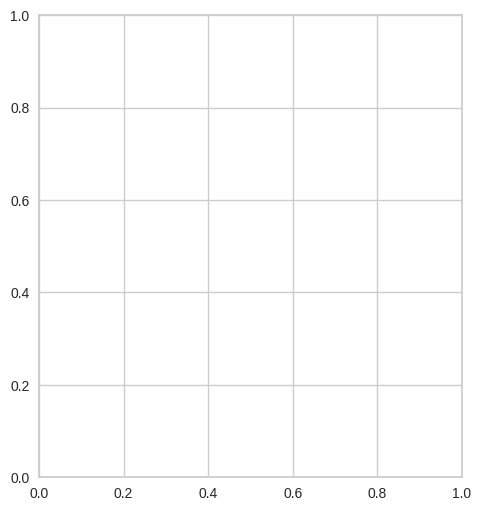

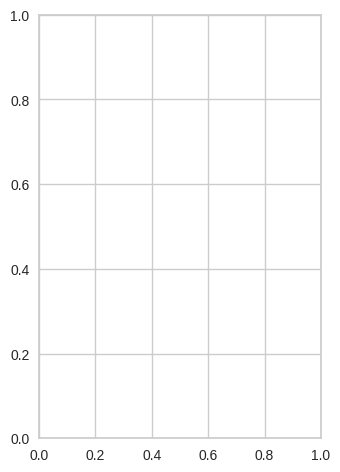

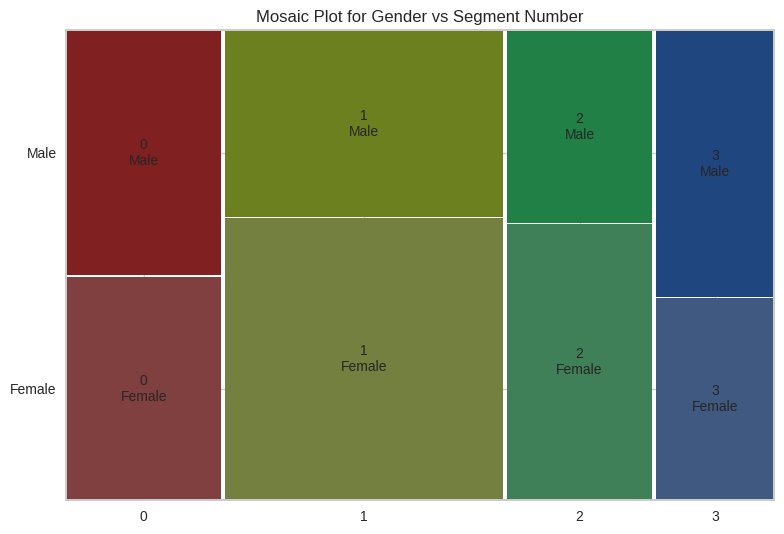

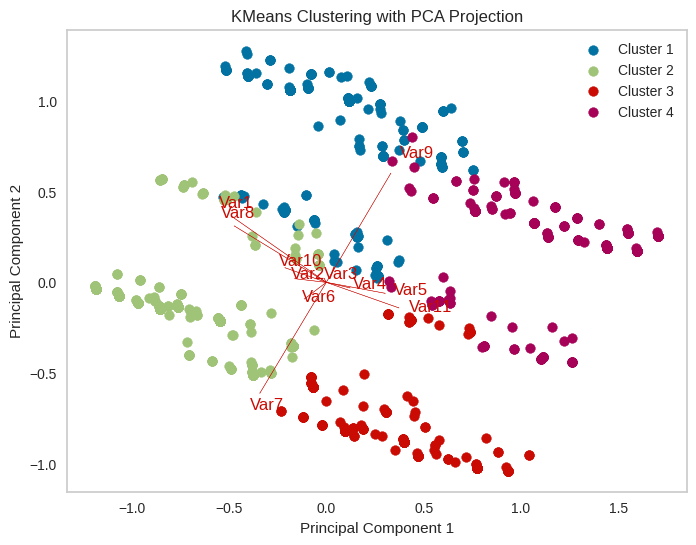

In [41]:
# Convert 'Yes' to 1 and 'No' to 0 in categorical columns
categorical_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
mcdonalds[categorical_columns] = (mcdonalds[categorical_columns] == 'Yes').astype(int)

# Perform KMeans clustering for 4 clusters
kmeans = KMeans(n_clusters=4, n_init=10, random_state=0)
kmeans_clusters = kmeans.fit_predict(mcdonalds[categorical_columns])
mcdonalds['cluster_num'] = kmeans.labels_

# Create mosaic plots using statsmodels
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
mosaic(pd.crosstab(kmeans_clusters, mcdonalds["Like"]).stack())
plt.title("Mosaic Plot for Like vs Segment Number")
plt.xlabel("Segment Number")

plt.subplot(1, 2, 2)
mosaic(pd.crosstab(kmeans_clusters, mcdonalds["Gender"]).stack())
plt.title("Mosaic Plot for Gender vs Segment Number")

plt.tight_layout()
plt.show()

# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(mcdonalds[categorical_columns])

# Plot the KMeans clusters with PCA projection
plt.figure(figsize=(8, 6))
for i in range(4):
    plt.scatter(MD_pca[kmeans_clusters == i, 0], MD_pca[kmeans_clusters == i, 1], label=f'Cluster {i + 1}')

# Plot the projection axes (if available)
loadings = np.round(pca.components_, 2)
for i in range(loadings.shape[1]):
    plt.arrow(0, 0, loadings[0, i], loadings[1, i], color='r', alpha=0.75)
    plt.text(loadings[0, i] * 1.15, loadings[1, i] * 1.15, f"Var{i + 1}", color='r')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering with PCA Projection')
plt.legend()
plt.grid()
plt.show()

### Step 8: Selecting (the) Target Segment(s)

   cluster_num  VisitFrequency
0            0        2.547988
1            1        2.584483
2            2        2.822368
3            3        2.654472
   cluster_num      Like
0            0  3.798762
1            1  3.794828
2            2  5.430921
3            3  6.739837
   cluster_num    Gender
0            0  0.523220
1            1  0.398276
2            2  0.411184
3            3  0.569106
   cluster_num    Gender      Like  VisitFrequency
0            0  0.523220  3.798762        2.547988
1            1  0.398276  3.794828        2.584483
2            2  0.411184  5.430921        2.822368
3            3  0.569106  6.739837        2.654472


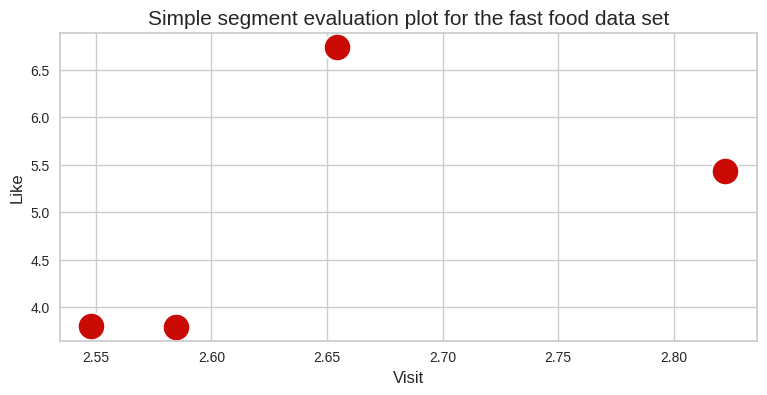

In [42]:
# calculating the mean of 'VisitFrequency'
mcdonalds['VisitFrequency'] = LabelEncoder().fit_transform(mcdonalds['VisitFrequency'])
visit = mcdonalds.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
print(visit)

# calculating the mean of 'Like'
mcdonalds['Like'] = LabelEncoder().fit_transform(mcdonalds['Like'])
Like = mcdonalds.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
print(Like)


mcdonalds['Gender'] = LabelEncoder().fit_transform(mcdonalds['Gender'])
Gender = mcdonalds.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
print(Gender)


segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
print(segment)


# targeting segments
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set", fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()